In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import io
from datasets import load_dataset
from IPython.display import display

/Users/tanaynayak/miniconda3/envs/ssw_hw1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load the dataset

dataset = load_dataset("THUDM/ImageRewardDB", "", split='train')

#TODO Subset
data = dataset.select(range(X))

for entry in data:
    print(entry)

/Users/tanaynayak/miniconda3/envs/ssw_hw1/lib/python3.10/site-packages/datasets/load.py:1454: FutureWarning: The repository for THUDM/ImageRewardDB contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/THUDM/ImageRewardDB
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


{'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x640 at 0x15F17EC50>, 'prompt_id': '000904-0035', 'prompt': 'perfect white haired egyptian goddess wearing white dove wings, warframe armor, regal, attractive, ornate, sultry, beautiful, ice queen, half asian, pretty face, blue eyes, detailed, scifi platform, 4 k, ultra realistic, epic lighting, illuminated, cinematic, masterpiece, art by akihito tsukushi, voidstar ', 'classification': 'People', 'image_amount_in_total': 7, 'rank': 3, 'overall_rating': 6, 'image_text_alignment_rating': 6, 'fidelity_rating': 5}
{'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x640 at 0x15EC9DF60>, 'prompt_id': '000904-0035', 'prompt': 'perfect white haired egyptian goddess wearing white dove wings, warframe armor, regal, attractive, ornate, sultry, beautiful, ice queen, half asian, pretty face, blue eyes, detailed, scifi platform, 4 k, ultra realistic, epic lighting, illuminated, cinematic, masterpiece, art by akihito 

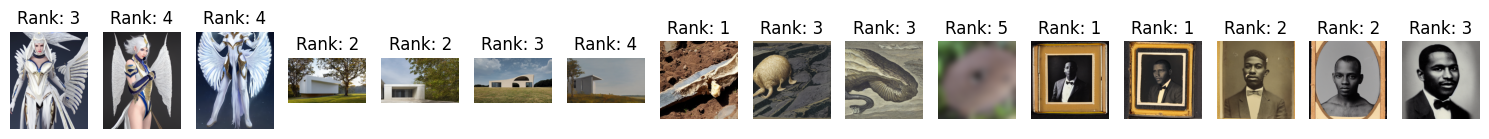

In [3]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(data), figsize=(15, 5))

# Iterate through the selected data and plot each image
for i, entry in enumerate(data):
    image = entry['image']  # Assuming this is how you access the image
    ax = axes[i]
    ax.imshow(image)
    ax.axis('off')  # Hide axes
    ax.set_title(f"Rank: {entry['rank']}")

plt.tight_layout()
plt.show()

In [4]:
# Assuming 'data' is already loaded and contains your dataset entries
pairwise_preferences = []
current_prompt = None
current_group = []

for entry in data:
    if entry['prompt'] != current_prompt:
        # Process the current group
        if current_group:
            for i in range(len(current_group)):
                for j in range(i + 1, len(current_group)):
                    if current_group[i]['rank'] != current_group[j]['rank']:
                        winner = current_group[i]
                        loser = current_group[j]
                        pairwise_preferences.append({
                            'prompt': current_prompt,
                            'winner': winner['image'],
                            'loser': loser['image']
                        })
        # Reset for new prompt
        current_prompt = entry['prompt']
        current_group = []

    current_group.append(entry)

# Don't forget to process the last group if exists
if current_group:
    for i in range(len(current_group)):
        for j in range(i + 1, len(current_group)):
            if current_group[i]['rank'] != current_group[j]['rank']:
                winner = current_group[i]
                loser = current_group[j]
                pairwise_preferences.append({
                    'prompt': current_prompt,
                    'winner': winner['image'],
                    'loser': loser['image']
                })

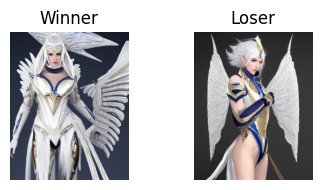

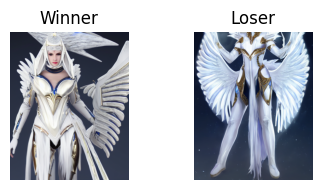

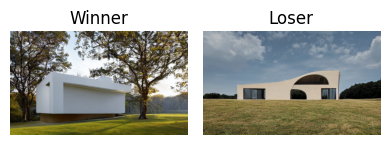

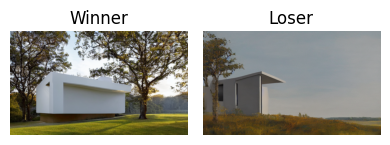

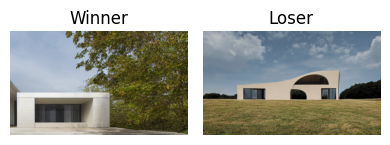

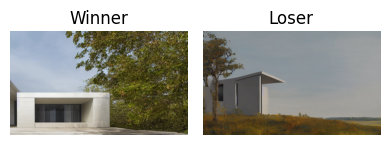

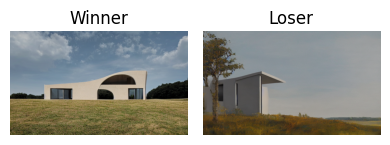

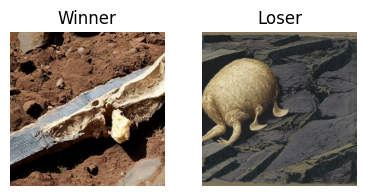

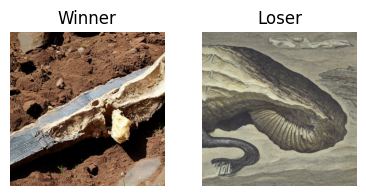

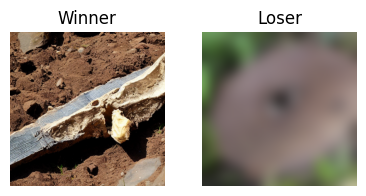

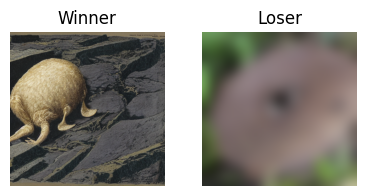

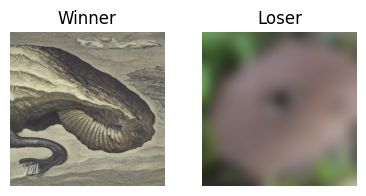

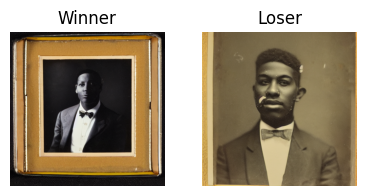

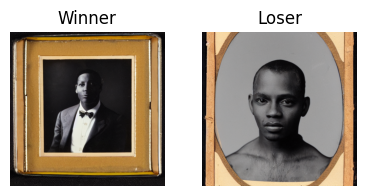

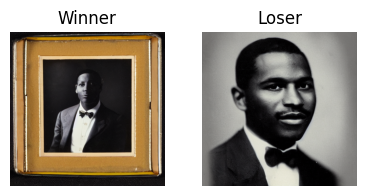

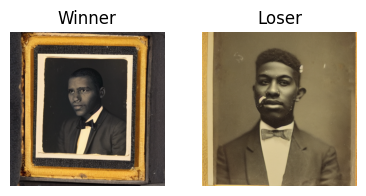

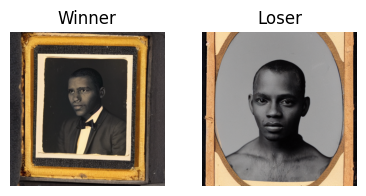

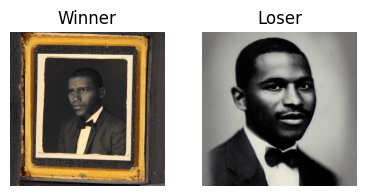

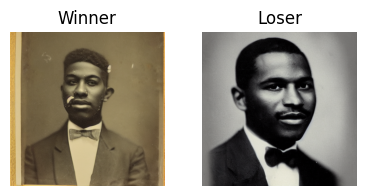

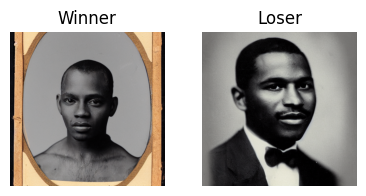

In [5]:
for pair in pairwise_preferences:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))

    # Load images if they are not already PIL images
    winner_image = Image.open(io.BytesIO(pair['winner'])) if isinstance(pair['winner'], bytes) else pair['winner']
    loser_image = Image.open(io.BytesIO(pair['loser'])) if isinstance(pair['loser'], bytes) else pair['loser']

    # Display Winner
    ax1.imshow(winner_image)
    ax1.set_title("Winner")
    ax1.axis('off')

    # Display Loser
    ax2.imshow(loser_image)
    ax2.set_title("Loser")
    ax2.axis('off')

    plt.tight_layout()
    display(fig)
    plt.close(fig)  # Close the figure to prevent direct output


In [ ]:
#TODO - Save to Parquet